In [1]:
%pylab inline
from sklearn.ensemble import ExtraTreesRegressor
import pickle

Populating the interactive namespace from numpy and matplotlib


/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
avs = np.array([0,1,2,3,5,10,20])
x = []
for av in avs:
    x.append(np.load("../data/GDR3/gaiadr3_%dext.npy" %(av)))
print(len(x[0]),x[0].dtype)

8102858 [('meh_ini', '<f8'), ('log_age', '<f8'), ('m_ini', '<f8'), ('m_act', '<f8'), ('log_lum', '<f8'), ('log_teff', '<f8'), ('log_grav', '<f8'), ('gaia_g', '<f8'), ('gaia_bpbr', '<f8'), ('gaia_bpft', '<f8'), ('gaia_rp', '<f8'), ('gaia_rvs', '<f8')]


In [3]:
g_ext = np.zeros(shape=(len(x[0]),len(x)))
bp_ext = np.zeros(shape=(len(x[0]),len(x)))
bpbr_ext = np.zeros(shape=(len(x[0]),len(x)))
rp_ext = np.zeros(shape=(len(x[0]),len(x)))
rvs_ext = np.zeros(shape=(len(x[0]),len(x)))
for i,item in enumerate(x):
    print(i,item[0])
    g_ext[:,i] = item["gaia_g"]
    bp_ext[:,i] = item["gaia_bpft"]
    bpbr_ext[:,i] = item["gaia_bpbr"]
    rp_ext[:,i] = item["gaia_rp"]
    rvs_ext[:,i] = item["gaia_rvs"]

0 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 9.192, 10.284, 10.319, 8.163, 7.692)
1 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 9.901, 11.247, 11.278, 8.767, 8.215)
2 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 10.58, 12.192, 12.218, 9.358, 8.737)
3 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 11.213, 13.109, 13.13, 9.925, 9.259)
4 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 12.478, 14.944, 14.953, 11.06, 10.303)
5 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 15.318, 19.362, 19.34, 13.698, 12.912)
6 (-1.49213, 6.6, 0.09, 0.09, -1.531, 3.5276, 3.986, 20.361, 27.904, 27.83, 18.514, 18.123)


In [4]:
# show the extinction law and on which parameters it is dependent
g_ext = g_ext - g_ext[:,0,None]
rvs_ext = rvs_ext - rvs_ext[:,0,None]
bp_ext = bp_ext - bp_ext[:,0,None]
rp_ext = rp_ext - rp_ext[:,0,None]
bpbr_ext = bpbr_ext - bpbr_ext[:,0,None]

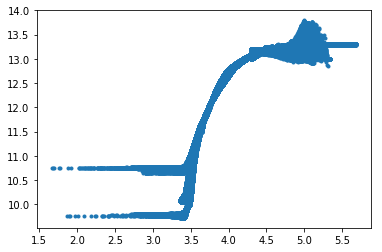

In [5]:
# We have a problem with a few outliers in extinction
cat = x[0]
cat = cat.view(np.recarray)
plt.plot(cat.log_teff,g_ext[:,-1],'.')
# THIS PROBLEM NO LONGER PERSISTS BECAUSE WE DELETED THOSE STARS

In [6]:
# Cleaning those outliers:
"""
exts = [g_ext,rvs_ext,bp_ext,rp_ext,bpbr_ext]
cut = []
for j,jtem in enumerate(exts):
    for i,av in enumerate(avs):
        if i == 0:
            continue
        cut.append(np.where(jtem[:,i]<0))
        cut.append(np.where(jtem[:,i]>(av+1)))
cut = np.hstack(cut) 
print(np.unique(cut,return_counts=True))
exclude_ids = np.unique(cut)
np.save("exclude_ids.npy", exclude_ids)
"""
exclude_ids = np.load("exclude_ids.npy")

In [7]:
# Applying the cuts to the catalogs. They indeed eliminate all those outliers.
"""
print(g_ext.shape)
g_ext = np.delete(g_ext,exclude_ids, axis = 0)
print(g_ext.shape)
bp_ext = np.delete(bp_ext,exclude_ids, axis = 0)
bpbr_ext = np.delete(bpbr_ext,exclude_ids, axis = 0)
rp_ext = np.delete(rp_ext,exclude_ids, axis = 0)
rvs_ext = np.delete(rvs_ext,exclude_ids, axis = 0)

for i in range(len(avs)):
    x[i] = np.delete(x[i],exclude_ids)
cat = x[0]
cat = cat.view(np.recarray)
"""

'\nprint(g_ext.shape)\ng_ext = np.delete(g_ext,exclude_ids, axis = 0)\nprint(g_ext.shape)\nbp_ext = np.delete(bp_ext,exclude_ids, axis = 0)\nbpbr_ext = np.delete(bpbr_ext,exclude_ids, axis = 0)\nrp_ext = np.delete(rp_ext,exclude_ids, axis = 0)\nrvs_ext = np.delete(rvs_ext,exclude_ids, axis = 0)\n\nfor i in range(len(avs)):\n    x[i] = np.delete(x[i],exclude_ids)\ncat = x[0]\ncat = cat.view(np.recarray)\n'

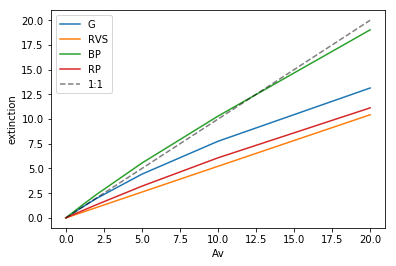

In [8]:
i = 99999
plt.plot(avs,g_ext[i], label = "G")
plt.plot(avs,rvs_ext[i], label = "RVS")
plt.plot(avs,bp_ext[i], label = "BP")
plt.plot(avs,rp_ext[i], label = "RP")
plt.plot(avs,avs,'k', label = "1:1", linestyle = "--", alpha = 0.5)
plt.xlabel("Av")
plt.ylabel("extinction")
plt.legend(loc = "best")

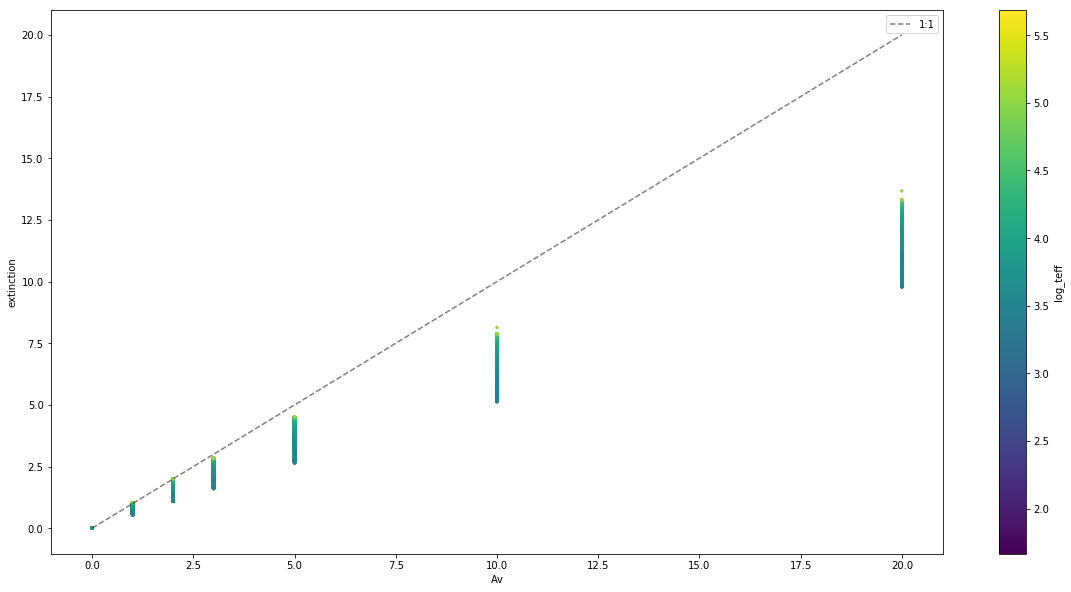

In [9]:
field = 'log_teff'
vmin = min(x[0][field])
vmax = max(x[0][field])
plt.figure(figsize=(20,10))
for i in np.random.choice(np.arange(len(x[0])),size = 1000, replace = False):
    plt.scatter(avs,g_ext[i],c = 7*[x[0][i][field]],s = 6, vmin = vmin, vmax = vmax, alpha = 1)
plt.plot(avs,avs,'k', label = "1:1", linestyle = "--", alpha = 0.5)
plt.xlabel("Av")
plt.ylabel("extinction")
plt.legend(loc = "best")
plt.colorbar(label = field)

In [10]:
# Cutting the catalog randomly in half for training and validation

def train_ext(feature,labels,band_name):
    """
    Training an extinction model from stellar parameters for a specific band
    """
    # creating a subsample on which to train
    test = np.random.choice(np.arange(len(feature)),size = int(len(feature)/100), replace = False)
    training_feature = feature[test]
    training_label = g_ext[test]
    # the rest is stored for validation
    test_feature = np.delete(feature, test)
    test_label = np.delete(g_ext,test, axis = 0)
    # prepare input for regression
    X = np.vstack((training_feature["log_teff"],training_feature["log_grav"],training_feature["meh_ini"],training_feature["log_lum"])).T
    y = training_label#[:,-1]
    X_test = np.vstack((test_feature["log_teff"],test_feature["log_grav"],test_feature["meh_ini"],test_feature["log_lum"])).T
    y_test = test_label#[:,-1]
    # train the model
    model = ExtraTreesRegressor(verbose = 1, n_jobs=-1, max_depth=20, criterion = 'mse',n_estimators=10, max_features = 4)
    model.fit(X,y)
    # validate
    y_pred = model.predict(X_test)
    print("90% of the validation set from Av = 1 has less than: ",np.percentile(np.abs(y_pred[:,1] - y_test[:,1]),90), "error in Av")
    print("model feature importance in the order: teff, logg, metallicity, lum: ",model.feature_importances_)
    # Save and reload model
    filename = "ext_model_" + band_name
    pickle.dump(model, open(filename, 'wb'))

In [11]:
train_ext(cat,rvs_ext,"rvs_band")
train_ext(cat,g_ext,"g_band")
train_ext(cat,bp_ext,"bpft_band")
train_ext(cat,bpbr_ext,"bpbr_band")
train_ext(cat,rp_ext,"rp_band")

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    3.7s remaining:    2.4s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    5.6s finished


90% of the validation set from Av = 1 has less than:  0.0036008272566842247 error in Av
model feature importance in the order: teff, logg, metallicity, lum:  [0.41340316 0.46519487 0.04840251 0.07299946]


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    3.6s remaining:    2.4s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    5.5s finished


90% of the validation set from Av = 1 has less than:  0.0036889977748109093 error in Av
model feature importance in the order: teff, logg, metallicity, lum:  [0.51104007 0.40129229 0.04952683 0.0381408 ]


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    3.5s remaining:    2.4s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    5.3s finished


90% of the validation set from Av = 1 has less than:  0.003385136532507538 error in Av
model feature importance in the order: teff, logg, metallicity, lum:  [0.4972348  0.42613995 0.04394084 0.03268441]


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    3.7s remaining:    2.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    5.5s finished


90% of the validation set from Av = 1 has less than:  0.0033450065359477144 error in Av
model feature importance in the order: teff, logg, metallicity, lum:  [0.51768024 0.39920754 0.04187826 0.04123395]


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    3.7s remaining:    2.4s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    5.3s finished


90% of the validation set from Av = 1 has less than:  0.0033249999999995783 error in Av
model feature importance in the order: teff, logg, metallicity, lum:  [0.54573428 0.34094775 0.04401752 0.06930044]


In [12]:
"""
model = MLPRegressor(hidden_layer_sizes=(100,100,), verbose = 1, activation = 'tanh',
                     learning_rate = 'adaptive', tol = 1e-5, max_iter = 50)
model.fit(X,y)
y_pred = model.predict(X_test)
print(np.percentile(np.abs(y_pred[:,1] - y_test[:,1]),95))
# Save and reload model
filename = "ext_model_gaia_g_nn"
pickle.dump(model, open(filename, 'wb'))
#loaded_model = pickle.load(open(filename, 'rb'))
"""

'\nmodel = MLPRegressor(hidden_layer_sizes=(100,100,), verbose = 1, activation = \'tanh\',\n                     learning_rate = \'adaptive\', tol = 1e-5, max_iter = 50)\nmodel.fit(X,y)\ny_pred = model.predict(X_test)\nprint(np.percentile(np.abs(y_pred[:,1] - y_test[:,1]),95))\n# Save and reload model\nfilename = "ext_model_gaia_g_nn"\npickle.dump(model, open(filename, \'wb\'))\n#loaded_model = pickle.load(open(filename, \'rb\'))\n'

In [19]:
# define a function that returns the ext in a band from model, av, and linear or quadratic fitting,
def av2ext(band_name,log_teff,log_grav,meh_ini,log_lum,av, av_axis = np.array([0,1,2,3,5,10,20])):
    """
    get extinctions for a specific band for an array of Av,and stellar parameters
    INPUT
       band_name = specific band (this will load a pre-trained extinction model)
       log_teff = teff
       log_grav = logg
       meh_ini = metallicity
       log_lum = luminosity
           the above stellar parameters have been used in the trainig
       av = av values of the stars
       av_axis = model grid of Av values (on these values the extinction model has been trained)
    OUTPUT
       ext_array are the extinctions in the band for which the model was trained
    """
    from scipy.interpolate import interp1d
    # Load the extinction model
    filename = "ext_model_%s_band" %(band_name)
    ext_model = pickle.load(open(filename, 'rb'))
    
    # prepare the features
    X = np.vstack((log_teff,log_grav,meh_ini,log_lum)).T
    # predict the extinction grid
    prediction = ext_model.predict(X)
    #interpolate cubic to a finer grid
    x_axis = np.linspace(0,20,41)
    f = interp1d(avs,prediction, kind = 'cubic', copy = False, bounds_error=False, fill_value='extrapolate', assume_sorted = True)
    result = f(x_axis)
    # prepare ext array
    ext_array = np.zeros_like(av)
    assert(len(ext_array)==len(result)),"Problem with dimensionality of ext_model input cat and av array"
    # for each star linearly interpolate the av value from the finer grid
    for i,item in enumerate(result):
        ext_array[i] = np.interp(av[i],x_axis,result[i], left = 0.)
    # if av > 20 then extrapolate linearly
    cut = (av>20)
    ext_array[cut] = ext_array[cut] * (av[cut]/20.)
    return(ext_array)

In [34]:
# teff, logg, and luminosity are completely covered from the isochrones. 
# but metallicity is wider in the galaxia catalogue. 
# But no strong biases to the extinction model occur nor any crazy things are happening even when extrapolating.
sample_size = 10
av_array = np.random.random_sample(size = sample_size)*41
result = av2ext("g",cat["log_teff"][0:sample_size],cat["log_grav"][0:sample_size],cat["meh_ini"][0:sample_size],cat["log_lum"][0:sample_size],av_array)
print(av_array)
print(result)
result = av2ext("g",cat["log_teff"][0:sample_size],cat["log_grav"][0:sample_size],sample_size * [1.5],cat["log_lum"][0:sample_size],av_array)
print(result)

[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


[10.08215801 16.81945013 34.67688968  8.53023001 33.86322642 24.06654956
 28.16078411 19.73922703 40.07336631  7.10836086]
[ 6.13913947  9.52643981 19.35634892  5.37420862 19.01984551 13.53053073
 15.88154498 11.15320647 22.64441405  4.64555588]
[ 5.9244531   9.25327254 18.8492206   5.15678895 18.53643384 13.16753126
 15.49054332 10.86789454 22.0728109   4.46166101]


[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


In [32]:
import numpy as np
for item in cat.dtype.names:
    print(item, np.unique(cat[item]))

meh_ini [-1.49213 -1.475   -1.45    -1.425   -1.4     -1.375   -1.35    -1.325
 -1.3     -1.275   -1.25    -1.225   -1.2     -1.175   -1.15    -1.125
 -1.1     -1.075   -1.05    -1.025   -1.      -0.975   -0.95    -0.925
 -0.9     -0.875   -0.85    -0.825   -0.8     -0.775   -0.75    -0.725
 -0.7     -0.675   -0.65    -0.625   -0.6     -0.575   -0.55    -0.525
 -0.5     -0.475   -0.45    -0.425   -0.4     -0.375   -0.35    -0.325
 -0.3     -0.275   -0.25    -0.225   -0.2     -0.175   -0.15    -0.125
 -0.1     -0.075   -0.05    -0.025   -0.       0.025    0.05     0.075
  0.1      0.125    0.15     0.175    0.2      0.225    0.25     0.275
  0.3      0.325    0.33631]
log_age [ 6.6      6.62     6.64     6.66     6.68     6.7      6.72     6.74
  6.76     6.78     6.8      6.82     6.84     6.86     6.88     6.9
  6.92     6.94     6.96     6.98     7.       7.02     7.04     7.06
  7.08     7.1      7.12     7.14     7.16     7.18     7.2      7.22
  7.24     7.26     7.28     7.3     